In [1]:
%cd D:\HDS\ปี 3 เทอม2\Machine Learning\Lecture5\Lecture5_TextClassification

D:\HDS\ปี 3 เทอม2\Machine Learning\Lecture5\Lecture5_TextClassification


# Activity

- Use the harry-potter dataset
- Explore the pattern
- Identify the cleaning points
- Conduct text cleaning
- Explore the word and character distribution
- Do you see different patterns from what you observed in the morning?

## Harry potter Dataset

In [2]:
import nltk
f = open('harry_7books.txt', encoding='utf8')
raw = f.read()
tokens = nltk.word_tokenize(raw)

## Explore the pattern

In [3]:
import re

### เลขที่เกี่ยวข้องกับหนังสือ
 - เลขมาตรฐานสากลประจำหนังสือ (ISBN) 10 หลัก เช่น 0-439-06486-4
   - เราจะเห็นได้ว่าในหนังสือเล่มนี้มีการอ้างอิงรหัส ISBN ไปถึงหนังสือต่างๆซึ่งจะเป็นการกล่าวถึงคำพูด ตัวละคร ในเล่มนั้นๆ
 - ระบบเลขมาตรฐานสำหรับหนังสือ LCCN เช่น 97-39059 98-46370

In [4]:
[w for w in tokens if re.search(r'[0-9]-', w)]

['0-439-06486-4',
 '98-46370',
 '1909-14',
 '978-0-545-02936-0',
 '0-545-02936-8',
 '00-131084',
 '0-439-13959-7',
 '0-439-78454-9',
 '0-439-35806-X',
 '0-439-13635-0',
 '99-23982',
 '0-590-35340-3',
 '97-39059']

## ปีที่มีการกล่าวถึงในเนื้อหาหนังสือ
 - อาจเป็นการกล่าวถึงเหตุการณ์ปีในเรื่อง
 - หรือเป็นการกล่าวถึงปีหนังสือ

In [5]:
[w for w in tokens if re.search(r'^[0-9]{4}$', w)]

['1999',
 '1999',
 '1920',
 '1999',
 '1999',
 '1875',
 '1492',
 '1289',
 '2007',
 '2007',
 '1966',
 '1967',
 '1975',
 '1977',
 '2007',
 '1945',
 '1689',
 '1960',
 '1960',
 '1981',
 '1981',
 '2000',
 '2000',
 '1920',
 '2000',
 '1792',
 '2005',
 '2005',
 '1920',
 '2005',
 '2003',
 '2003',
 '1920',
 '2003',
 '1875',
 '1749',
 '1999',
 '1999',
 '1920',
 '1999',
 '1999',
 '1612',
 '1722',
 '1296',
 '1997',
 '1998',
 '1920',
 '1998',
 '1998',
 '1945',
 '1473',
 '1945',
 '1709',
 '1637']

## เป็นคีย์เวิร์ดคำที่พูดในหนังสือ
 - อย่างคำว่า HE-WHO-MUST-NOT-BE-NAMED และ V-Voldemort ที่เป็นการกล่าวถึง Lord Voldemort ทั้งชื่อตรงและแบบโดยนัย
 - หรือการเล่นคำพูดของตัวละครในหนังสือ เช่น P-P-Potter ที่เป็นการเรียกตัวละครในเรื่อง

In [6]:
[w for w in tokens if re.search(r'^[A-Z]+-[A-Z]', w)]

['SECOND-YEAR',
 'D-Dia-gon',
 'MIMSY-PORPINGTON',
 'M-Millicent',
 'R-Riddle',
 'B-Bill',
 'T-Tongue-Tying',
 'D-Dark',
 'M-Master',
 'MUGGLE-BORN',
 'R-Reg',
 'YOU-KNOW-WHO',
 'R-Reparo.',
 'C-Cushioning',
 'P-Potter',
 'P-Peeves',
 'C-Crabbe',
 'C-Crabbe',
 'S-P-E-W',
 'S-P-E-W',
 'D-Dobby',
 'YOU-KNOW-WHO',
 'U-NO-POO—',
 'U-No-Poo.',
 'P-Potter',
 'U-No-Poo',
 'P-Petunia',
 'P-Professor',
 'MAD-EYE',
 'I-I',
 'P-P-Percy',
 'HALF-BREEDS',
 'I-I',
 'I-I',
 'I-I',
 'I-I',
 'FIRST-EVER',
 'V-Voldemort.',
 'V-Voldemort',
 'V-Voldemort',
 'V-Voldemort',
 'I-I',
 'I-I',
 'ANTI-DON',
 'CREATURE-INDUCED',
 'ENTRAIL-EXPELLING',
 'I-I',
 'G-Granger',
 'HE-WHO-MUST-NOT-BE-NAMED',
 'H-Hogwarts',
 'V-Voldemort',
 'P-P-Professor',
 'HE-WHO-MUST-NOT-BE-NAMED',
 'SECRET-KEEPER',
 'P-P-Petunia',
 'P-P-Potter',
 'D-Defense',
 'D-D-Dark',
 'P-P-Potter',
 'BREAK-IN',
 'I-I',
 'P-Professor']

## Identify cleaning point
 - \xad ที่แทรกอยู่ภายในคำ
 - ตัวอักขระพิเศษ ! (เครื่องหมายตกใจ) | , (คอมม่า) | : (โคลอน) | ; (เซมิโคลอน) | ? (เครื่องหมายคำถาม)
 - ตัวอักขระพิเศษ ’ | ’’ (คอมม่า)
 - ตัวอักขระพิเศษ — (ขีดยาว)
 - ตัวอักขระพิเศษ . (จุด)

In [7]:
identify_cleaning = set([w for w in tokens if re.search(r'[\,\?\!\:\;\’\—]\s*', w)])
identify_cleaning

{'!',
 ',',
 '12:30',
 '4:30',
 ':',
 ';',
 '?',
 'Dumbled—',
 'England—Fiction',
 'Magic—Fiction',
 'Schools—Fiction',
 'Sn—',
 'T—',
 'U-NO-POO—',
 'Wizards—Fiction',
 'You—',
 'aff—',
 'himself—',
 'off—',
 'of—',
 '—',
 '—dc21',
 '—ˮ',
 '—————————————————',
 '’'}

In [8]:
[w for w in tokens if re.search(r'\.$', w)][0:10]

['J.', 'K.', 'A.', 'P.', 'F.', '.', 'J.', 'K.', '.', 'Bros.']

In [9]:
[w for w in tokens if re.search(r'\xad', w)][0:10]

['dan\xadgling',
 'Smelt\xadings',
 'Un\xadcle',
 'mat\xadter',
 'sleep\xading',
 'four\xadteen',
 'sum\xadmer',
 'wiz\xadards',
 'bril\xadliant',
 'par\xadents']

## Conduct text cleaning
 - ลดขนาดตัวอักษรเป็นตัวพิมพ์เล็กทั้งหมด
 - ลบคำ stopwords
 - Lemmatization 

### Tokenize with remove stopwords and lower case

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [13]:
tokens = [w.lower() for w in tokens if not w.lower() in stop_words] #with remove stopwords

In [ ]:
#เขียนอีกวิธี
tokens_rm = list()
for w in tokens:
    if w not in stop_words:
        tokens_rm.append(w)

In [14]:
tokens[0:10]

['harry',
 'potter',
 'chamber',
 'secrets',
 'j.',
 'k.',
 'rowling',
 'illustrations',
 'mary',
 'grandpré']

### Remove /xad

In [15]:
remove_xad = re.compile(r'\xad')

In [16]:
[w for w in tokens if re.search(r'\xad', w)][0:10]

['dan\xadgling',
 'smelt\xadings',
 'un\xadcle',
 'mat\xadter',
 'sleep\xading',
 'four\xadteen',
 'sum\xadmer',
 'wiz\xadards',
 'bril\xadliant',
 'par\xadents']

In [17]:
tokens_cleaned = list()
for w in tokens:
    w = remove_xad.sub('',w)
    tokens_cleaned.append(w)

In [18]:
set([w for w in tokens if re.search(r'sleep', w)])

{'asleep',
 'asleep.',
 'oversleep',
 'sleep',
 'sleep-deprived',
 'sleep.',
 'sleepily',
 'sleepin',
 'sleepiness',
 'sleeping',
 'sleeping.',
 'sleepless',
 'sleeplessly',
 'sleeps',
 'sleepwalker',
 'sleepy',
 'sleepy-looking',
 'sleep\xading'}

### Cleaned.

In [19]:
set([w for w in tokens_cleaned if re.search(r'sleep', w)])

{'asleep',
 'asleep.',
 'oversleep',
 'sleep',
 'sleep-deprived',
 'sleep.',
 'sleepily',
 'sleepin',
 'sleepiness',
 'sleeping',
 'sleeping.',
 'sleepless',
 'sleeplessly',
 'sleeps',
 'sleepwalker',
 'sleepy',
 'sleepy-looking'}

### pattern keep 0-9 (A-Z upper case) (a-z lower case)

In [25]:
keep_text = re.compile("[^0-9a-zA-Z]")

In [26]:
set([w for w in tokens_cleaned if re.search(r'[\,\?\!\:\;\’\—]\s*', w)])

{'!',
 ',',
 '12:30',
 '4:30',
 ':',
 ';',
 '?',
 'aff—',
 'dumbled—',
 'england—fiction',
 'himself—',
 'magic—fiction',
 'off—',
 'of—',
 'schools—fiction',
 'sn—',
 't—',
 'u-no-poo—',
 'wizards—fiction',
 'you—',
 '—',
 '—dc21',
 '—ˮ',
 '—————————————————',
 '’'}

In [27]:
tokens_cleaned1 = list()
for w in tokens_cleaned:
    w = keep_text.sub('',w)
    tokens_cleaned1.append(w)

In [28]:
set([w for w in tokens_cleaned1 if re.search(r'[\,\?\!\:\;\’\—]\s*', w)])

set()

### Cleaned.

In [34]:
tokens_cleaned1[0:40]

['harry',
 'potter',
 'chamber',
 'secrets',
 'j',
 'k',
 'rowling',
 'illustrations',
 'mary',
 'grandpr',
 'arthur',
 'a',
 'levine',
 'books',
 'imprint',
 'scholastic',
 'press',
 'sen',
 'p',
 'f',
 'harris',
 '',
 'getaway',
 'driver',
 'foulweather',
 'friend',
 'text',
 'copyright',
 '',
 '1999',
 'j',
 'k',
 'rowling',
 '',
 'illustrations',
 'mary',
 'grandpr',
 'copyright',
 '',
 '1999']

### Lemmatization

In [35]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to C:\Users\CPE-
[nltk_data]     KMUTT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [36]:
tokens_cleaned2 = [wnl.lemmatize(w) for w in tokens_cleaned1]

### Conducted cleaning text รวม

In [62]:
remove_xad = re.compile(r'\xad')
keep_text = re.compile("[^0-9a-zA-Z]")

tokens = [w.lower() for w in tokens if not w.lower() in stop_words] # lower text and remove stopwords
tokens_cleaned = list()

for w in tokens: #remove \xad and keeping text
    w = keep_text.sub('',w)
    w = remove_xad.sub('',w)
    tokens_cleaned.append(w)
tokens_cleaned = [wnl.lemmatize(w) for w in tokens_cleaned] #Lemmatize

## Explore the word and character distribution
 - Wordcloud

In [65]:
from collections import Counter

In [66]:
tokens_cleaned = Counter(tokens_cleaned)

In [67]:
tokens_cleaned.most_common(10)

[('', 294308),
 ('harry', 18245),
 ('said', 14492),
 ('ron', 6332),
 ('hermione', 5358),
 ('dumbledore', 3366),
 ('back', 3247),
 ('could', 2861),
 ('one', 2709),
 ('know', 2462)]

In [68]:
del tokens_cleaned['']

In [69]:
tokens_cleaned2.most_common(10)

[('harry', 18245),
 ('said', 14492),
 ('ron', 6332),
 ('hermione', 5358),
 ('dumbledore', 3366),
 ('back', 3247),
 ('could', 2861),
 ('one', 2709),
 ('know', 2462),
 ('like', 2417)]

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [71]:
wc = WordCloud(width = 800, height = 400,
              background_color = "black", colormap="Paired",
              max_font_size = 150, max_words = 200)

(-0.5, 799.5, 399.5, -0.5)

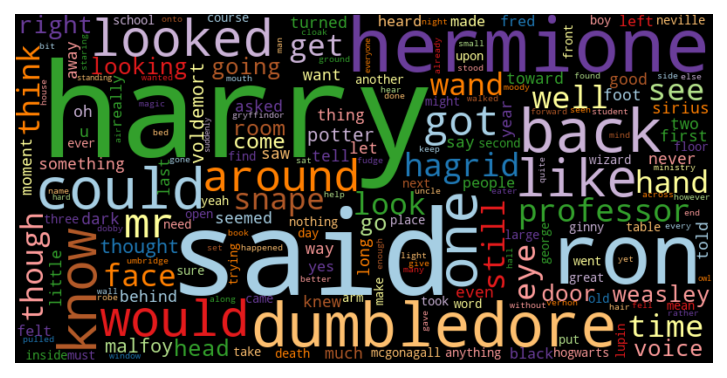

In [72]:
wc.generate_from_frequencies(tokens_cleaned2) #data counting years 1970 - 1990 from 1.
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

## อธิบายคำที่พบเจอจากการดูการกระจายตัวของคำ
 - จากการดูการกระจายตัวของคำ จะพบคำที่เป็นชื่อตัวละครหลักของเรื่องโดยส่วนใหญ่ ซึ่งก็คือ Harry Hermione Dumbledore Ron
 - และคำว่า said ที่เป็นคำที่ใช้ในการพูดถึงคำพูดตัวละครอื่นๆในบทสนทนาของเนื้อหาหนังสือ
 - และคำส่วนใหญ่จะเป็นคำที่เป็นการบอกการกระทำของตัวละครในเนื้อหาหนังสือ เช่น like know could

## Do you see different patterns from what you observed in the morning?
 - ตัวเลข/รหัสที่เกี่ยวข้องกับตัวชุดหนังสือ Harry potter ต่างๆ เช่น ISBN LCCN
 - Keywords คำพูดของตัวละครในเรื่อง